# 05 超参数

#### 超参数与模型参数
超参数: 在算法运行之前需要决定的参数(如 kNN 算法中的 k)<br>
模型参数: 算法运行过程中需要学习的参数(kNN 算法没有)<br>
    
寻找好的参数的方案:
- 领域知识
- 经验数值(一般封装在库中)
- 实验搜索

#### 不同距离的定义
- 曼哈顿距离: $\displaystyle d = \sum_{k=1}^n \left|x_k^{(i)} - x_k^{(j)}\right|$
- 欧拉距离: $\displaystyle d = \sqrt{\sum_{k=1}^n \left(x_k^{(i)} - x_k^{(j)}\right)^2}$
- 明可夫斯基距离: $\displaystyle d = \left(\sum_{k=1}^n \left|x_k^{(i)} - x_k^{(j)}\right|^p\right)^{\frac{1}{p}}$

### 1. 预备工作

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
# digits = datasets.load_digits()
# X = digits.data
# y = digits.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [4]:
kNN_Classifier = KNeighborsClassifier(n_neighbors=5)
kNN_Classifier.fit(X_train, y_train)
score = kNN_Classifier.score(X_test, y_test)
score

0.93333333333333335

### 2. 寻找最好的k

best_k = 11, best_score = 0.966667


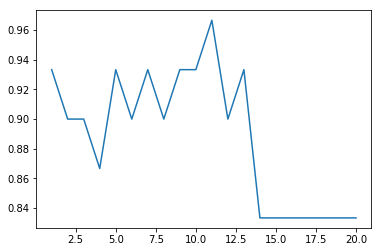

In [5]:
k_list = np.arange(1, 21)
score_list = []
for k in k_list:
    kNN_Classifier = KNeighborsClassifier(n_neighbors=k)
    kNN_Classifier.fit(X_train, y_train)
    score = kNN_Classifier.score(X_test, y_test)
    score_list.append(score)

score_list = np.array(score_list)
best_index = np.argmax(score_list)
best_k = k_list[best_index]
best_score = score_list[best_index]
print("best_k = %d, best_score = %f" % (best_k, best_score))
plt.plot(k_list, score_list)
plt.show()

### 3. 投票权重考虑距离？不考虑距离？

weight: uniform
best_k = 11
best_score = 0.966667
weight: distance
best_k = 6
best_score = 0.966667


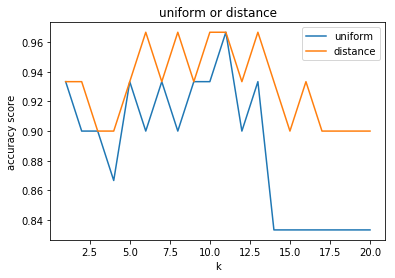

In [6]:
k_list = np.arange(1, 21)
weights_map = {0: 'uniform', 1: 'distance'}
weights_indexes = np.arange(0, len(weights_map))
score_list = []
for w in weights_map:
    weight = weights_map[w]
    score_list_one_method = []
    for k in k_list:
        kNN_Classifier = KNeighborsClassifier(n_neighbors=k, weights=weight)
        kNN_Classifier.fit(X_train, y_train)
        score = kNN_Classifier.score(X_test, y_test)
        score_list_one_method.append(score)
    score_list.append(score_list_one_method)

score_list = np.array(score_list)
best_indexes = np.argmax(score_list, axis=1)

for w in weights_map:
    
    best_k = k_list[best_indexes[w]]
    best_score = score_list[w, best_indexes[w]]
    
    print("weight: %s" % (weights_map[w]))
    print("best_k = %d" % (best_k))
    print("best_score = %f" % (best_score))
    plt.plot(k_list, score_list[w], label=weights_map[w])

plt.xlabel("k")
plt.ylabel("accuracy score")
plt.title("uniform or distance")
plt.legend()
plt.show()

### 4. 搜索明可夫斯基距离相应的p

best_k = 5
best_p = 4
best_score = 0.966667


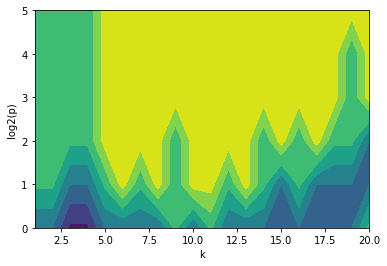

In [7]:
k_list = np.arange(1, 21)
p_list = np.array([1, 2, 4, 8, 16, 32])
score_list = []
for k in k_list:
    score_list_one_method = []
    for p in p_list:
        kNN_Classifier = KNeighborsClassifier(n_neighbors=k, p=p, weights='distance')
        kNN_Classifier.fit(X_train, y_train)
        score = kNN_Classifier.score(X_test, y_test)
        score_list_one_method.append(score)
    score_list.append(score_list_one_method)

score_list = np.array(score_list)

best_k_index, best_p_index = divmod(np.argmax(score_list), score_list.shape[1])
best_score = score_list[best_k_index, best_p_index]

print("best_k = %d" % (k_list[best_k_index]))
print("best_p = %d" % (p_list[best_p_index]))
print("best_score = %f" % (best_score))

xx, yy = np.meshgrid(k_list, np.log2(p_list))
plt.contourf(xx, yy, score_list.T)

plt.xlabel("k")
plt.ylabel("log2(p)")
plt.show()